In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
import sklearn.cluster

In [133]:
from scipy.cluster.hierarchy import dendrogram 
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [134]:
data = pd.read_csv('data_train.csv')
data = data.values

n_samples, n_features = data.shape
n_label = 3
print("n_label %d, \t n_samples %d, \t n_features %d"  % (n_label, n_samples, n_features - 2))

ftl_value = np.zeros(n_samples)
ftl_value = data[:,20]

labels = np.zeros(n_samples)
labels = data[:,63]

features = np.delete(data, [20,63], axis=1)
features = scale(features)

n_label 3, 	 n_samples 322, 	 n_features 62


In [135]:
kmeans_model = KMeans(n_clusters = n_label)
kmeans_model.fit(features)
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

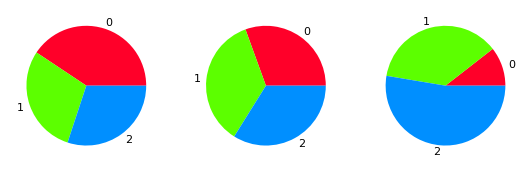

In [136]:
fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/n_label) for i in range(n_label)]
pie_labels = [str(i) for i in range(n_label)]
n_plots = n_label
images_per_row = 5
for i in range(n_label):
    labels_cluster = labels[kmeans_model.labels_ == i]
    labels_cluster_histogram = [sum(labels_cluster == j) for j in range(n_label)]
    plt.subplot(np.ceil(n_plots/images_per_row),images_per_row,i+1)
    plt.pie(labels_cluster_histogram, colors=colors, labels=pie_labels)

In [137]:
print(metrics.homogeneity_score(kmeans_model.labels_, labels))

0.01717754036869883


(322, 2)


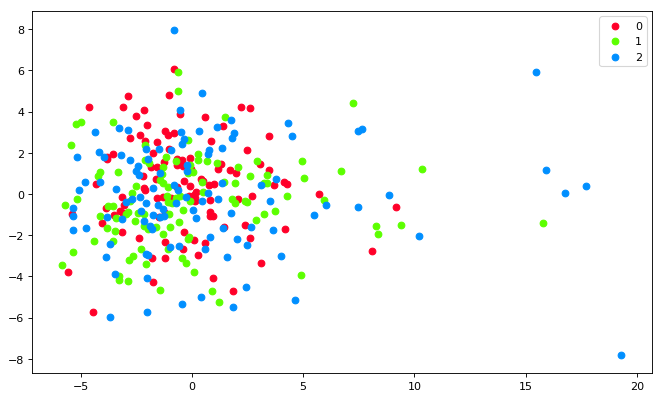

In [138]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
reduced_features = PCA(n_components=2).fit_transform(features)
print(reduced_features.shape)

colors = [cm(1.*i/n_label) for i in range(n_label)]
for i in range(n_label):
    ind = (labels==i)
    plt.scatter(reduced_features[ind,0], reduced_features[ind,1], c=[colors[i]], label=i)
plt.legend()

In [139]:
kmeans_model_pca = KMeans(n_clusters = n_label)
kmeans_model_pca = kmeans_model_pca.fit(reduced_features)
print(kmeans_model_pca.cluster_centers_)

[[ 1.10639678e+01  8.87808486e-03]
 [ 1.48702751e+00  6.99574854e-01]
 [-2.44621490e+00 -5.63162434e-01]]


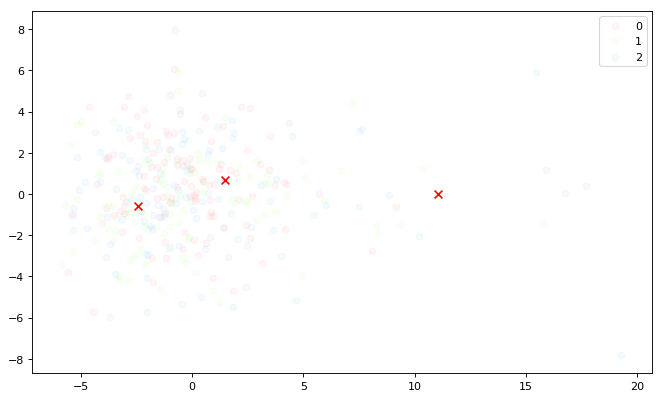

In [140]:
colors = [cm(1.*i/n_label) for i in range(n_label)]
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
for i in range(n_label):
    ind = (labels==i)
    plt.scatter(reduced_features[ind,0], reduced_features[ind,1], c=[colors[i]], label=i, alpha=0.04)
    plt.scatter(kmeans_model_pca.cluster_centers_[i,0], kmeans_model_pca.cluster_centers_[i,1], marker='x', s=50, c=[[1,0,0]])
plt.legend()

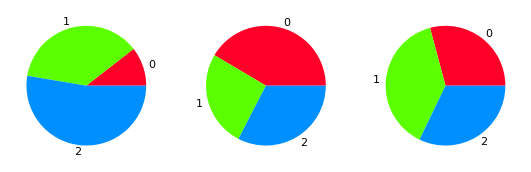

In [141]:
fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/n_label) for i in range(n_label)]
pie_labels = [str(i) for i in range(n_label)]
n_plots = n_label
images_per_row = 5
for i in range(n_label):
    labels_cluster = labels[kmeans_model_pca.labels_ == i]
    labels_cluster_histogram = [sum(labels_cluster == j) for j in range(n_label)]
    plt.subplot(np.ceil(n_plots/images_per_row),images_per_row,i+1)
    plt.pie(labels_cluster_histogram, colors=colors, labels=pie_labels)

In [142]:
print(metrics.homogeneity_score(kmeans_model_pca.labels_, labels))

0.023542676700661142


In [143]:
pca_model = PCA()
pca_model.fit(features)

e,v=np.linalg.eig(np.transpose(features)@features)

print(v[:,0])
print(e[0])
print(pca_model.components_[0,:])

[-0.01085942+0.j  0.04440658+0.j  0.03791701+0.j -0.04655883+0.j
  0.00842083+0.j -0.04536407+0.j  0.00168492+0.j  0.00761228+0.j
  0.00582057+0.j  0.01264819+0.j -0.00683031+0.j -0.01255295+0.j
 -0.00898917+0.j -0.01457272+0.j -0.01775259+0.j  0.08077937+0.j
 -0.08421088+0.j -0.04594833+0.j  0.01693729+0.j -0.06891661+0.j
  0.00223284+0.j  0.02301004+0.j  0.09917004+0.j  0.12961228+0.j
  0.12340528+0.j  0.2038899 +0.j -0.09229817+0.j  0.13668176+0.j
  0.19466783+0.j -0.09359486+0.j  0.15099364+0.j  0.20408244+0.j
 -0.05770341+0.j  0.12712912+0.j -0.00542766+0.j  0.0136613 +0.j
  0.17734472+0.j  0.20921458+0.j  0.20638059+0.j  0.2038899 +0.j
 -0.09229817+0.j  0.13668176+0.j  0.19466783+0.j -0.09359486+0.j
  0.15099364+0.j  0.20408244+0.j -0.05770341+0.j  0.12712912+0.j
 -0.01283038+0.j  0.01490532+0.j  0.19013782+0.j  0.21721247+0.j
  0.21109384+0.j  0.21194464+0.j -0.12913942+0.j  0.17424567+0.j
  0.20040443+0.j -0.13181283+0.j  0.1900628 +0.j  0.20676058+0.j
 -0.15062798+0.j  0.17844

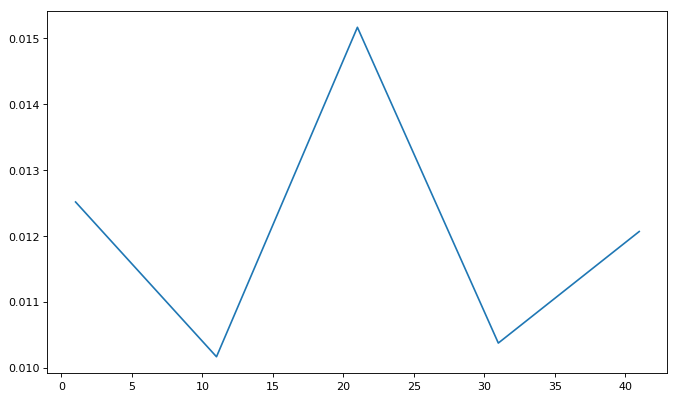

In [163]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
hvec = []
reduced_data = pca_model.fit_transform(features)
for n_dims in range(1,50, 10):
    reduced_data = PCA(n_components=n_dims).fit_transform(features)
    kmeans_model_pca = KMeans(n_clusters = n_label)
    kmeans_model_pca = kmeans_model_pca.fit(reduced_data)
    hvec.append(metrics.homogeneity_score(kmeans_model_pca.labels_, labels))
plt.plot(range(1,50, 10), hvec)

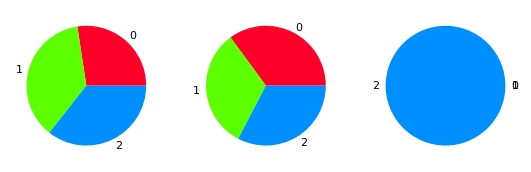

In [145]:
h_model = sklearn.cluster.AgglomerativeClustering(n_clusters=3)
h_model.fit(features)

fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/n_label) for i in range(n_label)]
pie_labels = [str(i) for i in range(n_label)]
n_plots = n_label
images_per_row = 5
for i in range(n_label):
    labels_cluster = labels[kmeans_model_pca.labels_ == i]
    labels_cluster_histogram = [sum(labels_cluster == j) for j in range(n_label)]
    plt.subplot(np.ceil(n_plots/images_per_row),images_per_row,i+1)
    plt.pie(labels_cluster_histogram, colors=colors, labels=pie_labels)

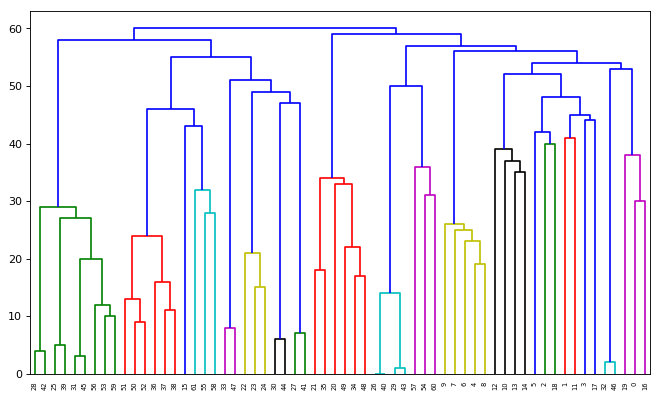

In [161]:
feature_h_model = sklearn.cluster.FeatureAgglomeration()
feature_h_model.fit(features)
feature_h_model.labels_
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plot_dendrogram(feature_h_model)